<a href="https://colab.research.google.com/github/Adhyatik/MLM-PROJECT-REPORT/blob/main/simpleNN_singleNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Last amended: Ist July, 2024
# Ref: https://www.kaggle.com/code/ryanholbrook/a-single-neuron
# Try to standardscale and then execute this notebook

In [2]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/deeplearning/red_wine.csv"

In [6]:
# 2.2 Full file path:
path = Path(pathToFolder) / "red_wine.csv"

In [7]:
# 3.0 Read data
red_wine = pd.read_csv("/gdrive/MyDrive/deeplearning/red_wine.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: title={'center': 'fixed acidity'}, ylabel='Frequency'>

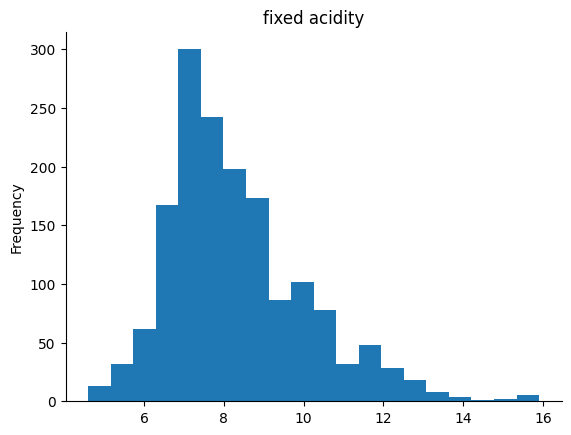

In [13]:
# @title fixed acidity

from matplotlib import pyplot as plt
red_wine['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
# 3.1
red_wine.shape   # (1599, 12)
red_wine.dtypes

(1599, 12)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# 3.2 Get target and predictors:
y = red_wine.pop("quality")
X = red_wine

In [23]:
# 4.0 Build model:

model = tf.keras.Sequential()

In [24]:
# 4.1 # to above model add
model.add(layers.Input( shape = (11,) ) )

In [26]:
# 4.2 # one neuron is added (1) and bias is automatically and then compile the model
# experiment with activation function as linear and sigmoid and see the difference in mae and sigmoid will give more error due to the large predicted - observed
model.add(layers.Dense(1, activation= "sigmoid"))

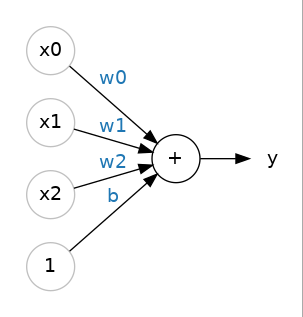

In [27]:
# 4.2.1
weights, bias = model.weights

In [28]:
# 4.2.2
weights

<tf.Variable 'dense_4/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.19970173],
       [-0.07318938],
       [ 0.27094436],
       [-0.01073664],
       [-0.5489878 ],
       [-0.04313934],
       [ 0.04877657],
       [ 0.64877945],
       [ 0.05976927],
       [ 0.4261908 ],
       [-0.50238484]], dtype=float32)>

In [29]:
# 4.2.3
bias

<tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [30]:
#4.3 Compile
model.compile( loss = "mae")

In [31]:
# 4.4 Train
model.fit(X,y, epochs = 100 )

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 4.9591
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 4.7125
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 4.6548
Epoch 4/100
50/50 [==============================] - 0s 1ms/step - loss: 4.6404
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 4.6372
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 4.6363
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 4.6361
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 4.6361
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 4.6360
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 4.6360
Epoch 11/100
50/50 [==============================] - 0s 2ms/step - loss: 4.6360
Epoch 12/100
50/50 [==============================] - 0s 1ms/step - loss: 4.6360
Epoch 13/100
50/50 [=================

In [ ]:
# 5.0 Predict
pred = model.predict(X)

50/50 [==============================] - 0s 1ms/step


In [ ]:
# 5.1 Round up decimal places
pred = np.round(pred)


In [ ]:
# 5.1.1
y.shape

(1599,)

In [ ]:
# 5.2 Compare:
np.sum(pred == y.values.reshape(1599,1))/1599

0.5828642901813633

In [ ]:
######### --------Done ---------------